In [1]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
from networkx.algorithms import isomorphism
from networkx.algorithms import components
from collections import Counter

mpl.rc('text', usetex = True)
plt.rcParams.update({'figure.max_open_warning': 0})
d = 2

In [2]:
family = {d: [nx.complete_graph(d)]}

In [3]:
def add_if_new(existing, potential):
    for old in existing:
        if nx.is_isomorphic(potential, old):
            break
    else:
        existing.append(potential)

In [4]:
def extend(graph, size):
    new_things = []
    
    for r in itertools.combinations(graph, d):
        modified = graph.copy()
        modified.add_node(size)
        for i in r:
            modified.add_edge(i, size)
            
        add_if_new(new_things, modified)

    return new_things

In [5]:
def extend_full(graphs, size):
    next_layer = []
    
    for base_graph in graphs:
        for extended in extend(base_graph, size):
            add_if_new(next_layer, extended)

    return next_layer

In [6]:
def count_colourings(graph):
    GM = isomorphism.GraphMatcher(graph, graph)
    c = Counter()
    
    for iso in GM.isomorphisms_iter():
        h = nx.Graph()
        h.add_edges_from(iso.items())
        c[components.number_connected_components(h)] += 1
    
    return(c)

In [7]:
def monomial(i,j):
    if i == 1 & j == 1:
        return "M"
    elif i == 1:
        return str(j) + "M"
    elif j == 1:
        return "M^" + str(i)
    else:
        return str(j) + "M^" + str(i)

In [8]:
def get_formula(graph):
    coeffs = count_colourings(graph)
    tot = sum(coeffs.values())
    tidy = sorted(coeffs.items(), reverse=True)
    string = "+".join(monomial(i, j) for (i, j) in tidy)
    if tot == 1:
        return "$" + string + "$"
    else:
        return "$\\frac{1}{" + str(tot) + "}(" + string + ")$"

In [9]:
for n in range(d, 8):
    family[n + 1] = extend_full(family[n], n)

In [10]:
{i:len(j) for (i, j) in family.items()}

{2: 1, 3: 1, 4: 1, 5: 3, 6: 11, 7: 61, 8: 499}

/Users/bmehta/.pyenv/versions/3.6.2/envs/aqc/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


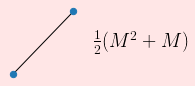

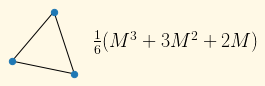

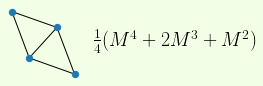

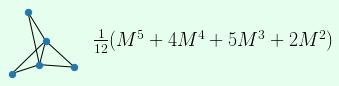

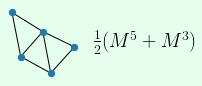

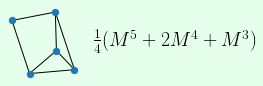

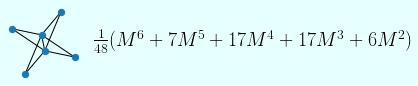

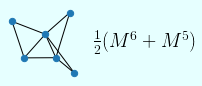

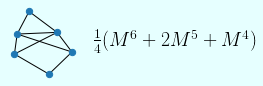

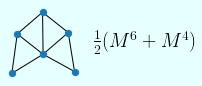

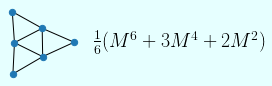

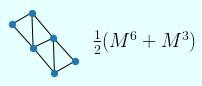

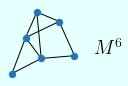

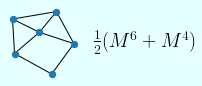

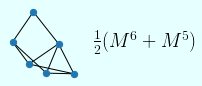

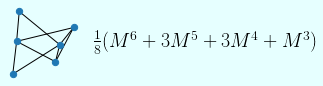

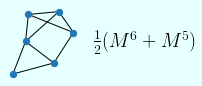

In [11]:
for n in range(d, 7):
    gs = family[n]

    colour = mpl.colors.hsv_to_rgb([(n - 2) / 8, 0.1, 1])
    for g in gs:
        fig = plt.figure(figsize=(1, 1))
        nx.draw_spring(g, node_size=40)
        plt.text(1.2, 0.3, get_formula(g), ha='left', va='bottom', fontsize=20, transform=fig.transFigure)
        fig.patch.set_facecolor(colour)